In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv('../data/BMW_Car_Sales_Classification.csv')
print(df.head())
print(df.info())

      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-N

In [187]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64


In [188]:
#the average price of each car model, helping identify which models are typically more or less expensive.
avg_price_by_model = df.groupby("Model")["Price_USD"].mean()
print(avg_price_by_model.head())

Model
3 Series    75566.233950
5 Series    75287.844077
7 Series    75570.196742
M3          74841.588715
M5          74474.930996
Name: Price_USD, dtype: float64


In [189]:
#shows how car sales are distributed across different regions, revealing market concentration.
sales_by_region = df["Region"].value_counts()
print(sales_by_region)

Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64


In [190]:
#Average Engine Size by Fuel Type
engine_by_fuel = df.groupby("Fuel_Type")["Engine_Size_L"].mean()
print(engine_by_fuel)

Fuel_Type
Diesel      3.247615
Electric    3.235787
Hybrid      3.250692
Petrol      3.254518
Name: Engine_Size_L, dtype: float64


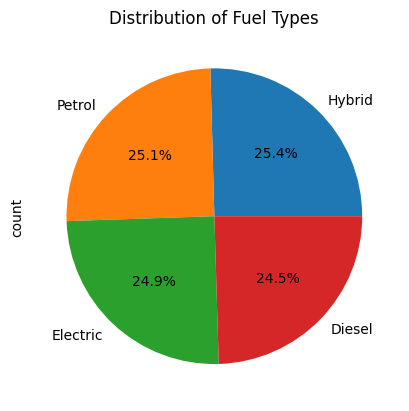

In [191]:
df["Fuel_Type"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Fuel Types")
plt.show()

In [192]:
#Displays the count of automatic vs manual transmissions, indicating user or manufacturer preferences.
trans_dist = df["Transmission"].value_counts()
print(trans_dist)

Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64


In [193]:
#Shows how pricing differs among high, medium, and low sales categories.
price_by_sales_class = df.groupby("Sales_Classification")["Price_USD"].mean()
print(price_by_sales_class)

Sales_Classification
High    74966.819756
Low     75064.335357
Name: Price_USD, dtype: float64


In [194]:
#total cars sold in each region to highlight where demand is strongest.
total_sales_by_region = df.groupby("Region")["Sales_Volume"].sum()
print(total_sales_by_region)

Region
Africa           41565252
Asia             42974277
Europe           42555138
Middle East      42326620
North America    42402629
South America    41551818
Name: Sales_Volume, dtype: int64


In [195]:
#Lists the 10 best-selling car models overall.
top_models = df.groupby("Model")["Sales_Volume"].sum().nlargest(10)
print(top_models)

Model
7 Series    23786466
i8          23423891
X1          23406060
3 Series    23281303
i3          23133849
5 Series    23097519
M5          22779688
X3          22745529
X5          22709749
X6          22661986
Name: Sales_Volume, dtype: int64


In [196]:
#how fuel type influences whether a car is categorized as high or low sales.
sales_class_by_fuel = df.groupby("Fuel_Type")["Sales_Classification"].value_counts()
print(sales_class_by_fuel.head())

Fuel_Type  Sales_Classification
Diesel     Low                     8505
           High                    3758
Electric   Low                     8677
           High                    3794
Hybrid     Low                     8837
Name: count, dtype: int64


In [197]:
#how mileage trends over years, possibly indicating aging inventory.
mileage_by_year = df.groupby("Year")["Mileage_KM"].mean()
print(mileage_by_year.head())

Year
2010     99102.597297
2011     98849.272727
2012    100403.027311
2013     99859.341251
2014    100706.354328
Name: Mileage_KM, dtype: float64


In [198]:
#the proportion of highly sold models in each region.
high_sales_by_region = df[df["Sales_Classification"] == "High"].groupby("Region")["Model"].count() / df.groupby("Region")["Model"].count() * 100
print(high_sales_by_region)

Region
Africa           29.916394
Asia             30.967589
Europe           31.305496
Middle East      29.941479
North America    30.569886
South America    30.238759
Name: Model, dtype: float64


In [199]:
#Average Price by Engine Size
price_by_engine = df.groupby("Engine_Size_L")["Price_USD"].mean()
print(price_by_engine.head())

Engine_Size_L
1.5    74680.549296
1.6    74801.096369
1.7    75102.728491
1.8    74099.338256
1.9    75174.268525
Name: Price_USD, dtype: float64


In [200]:
#Average Sales Volume by Transmission
sales_by_trans = df.groupby("Transmission")["Sales_Volume"].mean()
print(sales_by_trans)

Transmission
Automatic    5071.788497
Manual       5063.293194
Name: Sales_Volume, dtype: float64


In [201]:
#how many cars fall into recent model-year categories.
year_bins = pd.cut(df["Year"], bins=[2010, 2015, 2020, 2024])
#year_dist = df.groupby(year_bins)["Model"].count()
year_dist = df.groupby(year_bins, observed=False)["Model"].count()
print(year_dist)

Year
(2010, 2015]    16644
(2015, 2020]    16530
(2020, 2024]    13496
Name: Model, dtype: int64


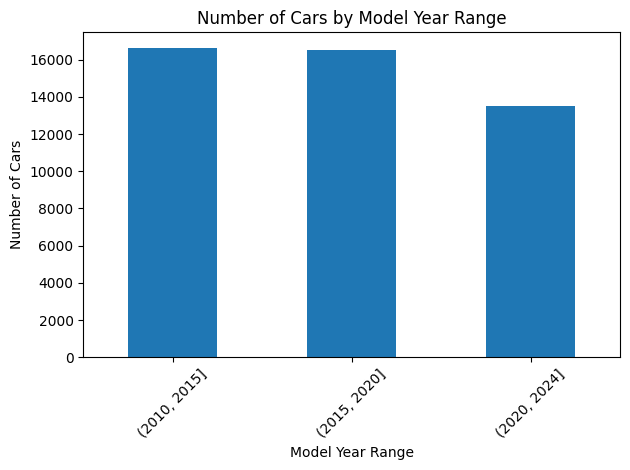

In [202]:
year_dist.plot(kind="bar")
plt.title("Number of Cars by Model Year Range")
plt.xlabel("Model Year Range")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

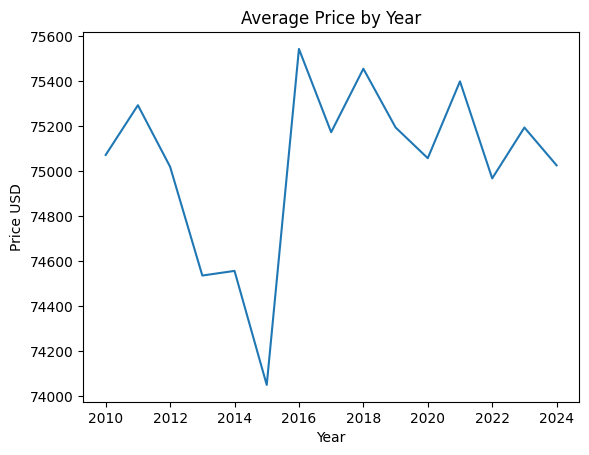

In [203]:
df.groupby("Year")["Price_USD"].mean().plot(kind="line")
plt.title("Average Price by Year")
plt.ylabel("Price USD")
plt.show()

In [204]:
#how mileage affects a car's sales classification
sales_class_by_mileage = df.groupby("Mileage_KM")["Sales_Classification"].value_counts()
print(sales_class_by_mileage.head())

Mileage_KM  Sales_Classification
3           Low                     1
21          High                    1
23          Low                     1
29          Low                     1
36          Low                     1
Name: count, dtype: int64


In [205]:
#Total Sales by Fuel Type
total_sales_by_fuel = df.groupby("Fuel_Type")["Sales_Volume"].sum()
print(total_sales_by_fuel)

Fuel_Type
Diesel      62361818
Electric    63157665
Hybrid      64532097
Petrol      63324154
Name: Sales_Volume, dtype: int64


In [206]:
#Top 5 Regions by Average Price
top_regions_by_price = df.groupby("Region")["Price_USD"].mean().nlargest(5)
print(top_regions_by_price)

Region
Asia             75554.925006
North America    75070.054709
Europe           74988.356851
South America    74973.598837
Africa           74885.771598
Name: Price_USD, dtype: float64


In [207]:
#Sales Classification by Color
sales_class_by_color = df.groupby("Color")["Sales_Classification"].value_counts()
print(sales_class_by_color.head())

Color  Sales_Classification
Black  Low                     5777
       High                    2496
Blue   Low                     5709
       High                    2553
Grey   Low                     5854
Name: count, dtype: int64


In [208]:
#Average Engine Size by Region
engine_by_region = df.groupby("Region")["Engine_Size_L"].mean()
print(engine_by_region)

Region
Africa           3.258124
Asia             3.231571
Europe           3.238193
Middle East      3.256157
North America    3.249766
South America    3.249582
Name: Engine_Size_L, dtype: float64


In [209]:
#Sales Trend Over Years
sales_by_year = df.groupby("Year")["Sales_Volume"].mean()
print(sales_by_year)

Year
2010    5085.118619
2011    5112.550641
2012    5027.579532
2013    5071.176488
2014    5062.376119
2015    5065.576831
2016    5039.390788
2017    5051.918237
2018    5006.794692
2019    5068.383255
2020    5089.186583
2021    5007.314947
2022    5152.658424
2023    5053.946567
2024    5114.634958
Name: Sales_Volume, dtype: float64


In [210]:
#Count of Cars Above $100,000
high_price_cars = len(df[df["Price_USD"] > 100000])
print(f"Cars with Price > 100,000 USD: {high_price_cars}")

Cars with Price > 100,000 USD: 11124


In [211]:
# Count of each high-price car model
high_price_model_counts = df[df["Price_USD"] > 100000]["Model"].value_counts()
print(high_price_model_counts)

Model
5 Series    1083
3 Series    1067
X1          1043
7 Series    1025
M5          1005
X3          1005
i8          1001
i3           989
X5           971
M3           968
X6           967
Name: count, dtype: int64


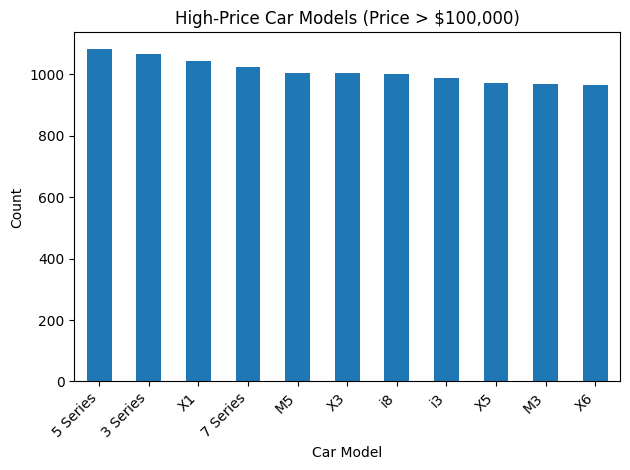

In [212]:
high_price_model_counts.plot(kind="bar")
plt.title("High-Price Car Models (Price > $100,000)")
plt.xlabel("Car Model")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()

In [213]:
#Checks if automatic or manual cars tend to sell better.
high_sales_by_trans = df[df["Sales_Classification"] == "High"].groupby("Transmission")["Model"].count() / df.groupby("Transmission")["Model"].count() * 100
print(high_sales_by_trans)

Transmission
Automatic    30.568301
Manual       30.416634
Name: Model, dtype: float64


In [214]:
#Average Car Price by Region
price_by_region = df.groupby("Region")["Price_USD"].mean()
print(price_by_region)

Region
Africa           74885.771598
Asia             75554.925006
Europe           74988.356851
Middle East      74726.788487
North America    75070.054709
South America    74973.598837
Name: Price_USD, dtype: float64


In [215]:
#Sales Volume by Car Color
sales_by_color = df.groupby("Color")["Sales_Volume"].mean()
print(sales_by_color.head())

Color
Black     5041.785688
Blue      5080.215565
Grey      5030.563129
Red       5051.421836
Silver    5110.661317
Name: Sales_Volume, dtype: float64


In [216]:
#Total Sales Volume by Model
total_sales_by_model = df.groupby("Model")["Sales_Volume"].sum()
print(total_sales_by_model.head())

Model
3 Series    23281303
5 Series    23097519
7 Series    23786466
M3          22349694
M5          22779688
Name: Sales_Volume, dtype: int64


In [217]:
#Top 5 Years with Highest Average Sales
top_years_by_sales = df.groupby("Year")["Sales_Volume"].mean().nlargest(5)
print(top_years_by_sales)

Year
2022    5152.658424
2024    5114.634958
2011    5112.550641
2020    5089.186583
2010    5085.118619
Name: Sales_Volume, dtype: float64


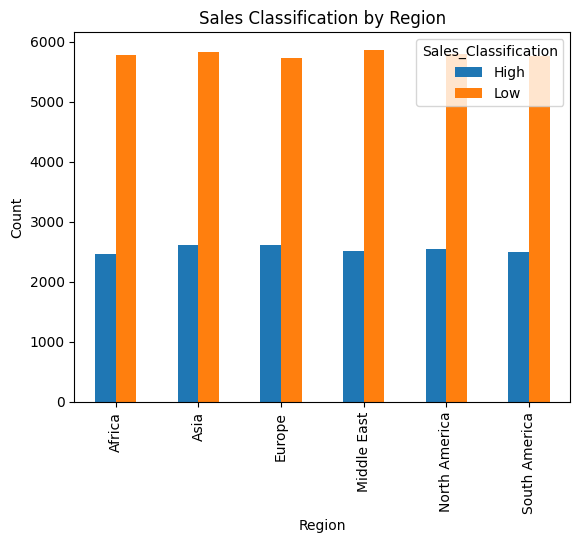

In [218]:
df.groupby("Region")["Sales_Classification"].value_counts().unstack().plot(kind="bar")
plt.title("Sales Classification by Region")
plt.ylabel("Count")
plt.show()

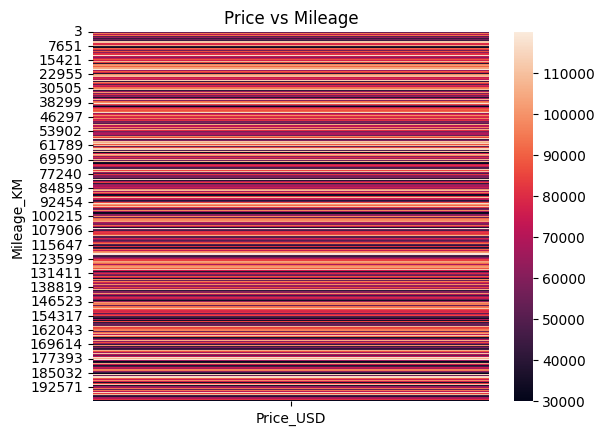

In [219]:
pivot = df.pivot_table(values="Price_USD", index="Mileage_KM", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Price vs Mileage")
plt.show()